# CLUSTERING 
Para realizar el clustering y agrupar empresas segun patrones financieros y bursatiles, nos vamos a centrar en variables que capturen distintos aspectos fundamentales, como la rentabilidad, la solidez financiera, el crecimiento y la valoracion.

Para evitar el problema de la alta dimensionalidad y la redundancia de información, usaremos solamnete 9 variables, seleccionando aquellas que cubran los cuatro grandes ejes (rentabilidad, solvencia, valoración y crecimiento). Hemos decidido seleccionar las siguientes variables para hacer el clustering: 

### Rentabilidad: 

- **ROE**: Mide la rentabilidad que obtiene una empresa sobre el dinero que han invertido sus accionistas. Suele estar entre 10% y 20%, empresas de sectores de alto rendimiento pueden superar el 20% mientras que sectores mas tradicionales un ROE en torno al 10%-15% suele ser aceptable. 
- **EBITDA Margin** o **Net Income Margin**: Evalúa la rentabilidad operativa. Generalmente entre el 10% y el 20%, aunque en industrias con menos costes operativos (por ejemplo, software o servicios) puede ser superior. 

### Solvencia y Liquidez

- **Debt_to_Equity** (o **DER**): Permite medir el nivel de endeudamiento. Un DER inferior a 1 es generalmente visto como saludable, sin embargo en industrias intensivas en capital es posible encontrar valores cercanos o superen el 1 (incluso llegar al 2). 
- **Current Ratio**: Asegura que la empresa puede cumplir con sus obligaciones a corto plazo. Un valor entre 1 y 2 es considerado adecuado, valores inferiores a 1 pueden señalar problemas de liquidez y valores muy altos podrian indicar una utilizacion ineficiente de los activos. 
- **Free Cash Flow**: Indica la capacidad para generar liquidez y financiar inversiones sin recurrir a deuda. 

### Valoración

- **P/E Ratio (Precio/BENEFICIO)**: Es clave para entender la valoración de la empresa en relación con sus beneficios. Frecuentemente entre 15 y 25, en epocas de optimismo o en secotres de alto crecimiento (como tecnologia) puede ser mayor. 
- **P/S Ratio (Precio/Ventas)**: Complementa la valoración al considerar las ventas, útil especialmente para sectores con márgenes muy variables. Normalmente entre 1 y 3, aunque en sectores de alto crecimiento podria ser superior. 

### Crecimiento

- **Sales_Growth**: Mide el crecimiento en ingresos en un periodo de tiempo. Suele estar entre 0% y 10%, empresas en fases de expansion o de alto crecimiento pueden superar el 10%. 
- **Price_Growth**: Refleja el comportamiento del precio de la acción a lo largo del tiempo. Se puede situar entre el 5% y el 15% aunque depende de varios factores. 

Adicionalmente podriamos sustituir alguna variable por otra como por ejemplo sustituir el ROE por el ROIC, esto lo hariamos si buscamos una medida que incluya tambien el capital invertido. Tambien podemos añadir otras variables como el **Market Cap** para tener en cuenta el tamaño. Pero este conjunto nos permite capturar los aspectos clave de la salud financiera y la proyección de la empresa

In [ ]:
## Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Cargamos la base de datos
df = pd.read_pickle('data01032025.pkl')
df.head()

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,Earnings_Per_Share,P/E_Ratio,Net_Income_Margin,Revenue_Per_Share,P/S_Ratio,Market_Cap,Yearly_Return,return_5y,Sales_Growth,Price_Growth
0,A,2013,3.894000e+09,199000000.0,1.098000e+09,724000000.0,2.675000e+09,5.397000e+09,5.286000e+09,602000000.0,...,1.202658,31.375653,0.185927,6.468439,5.833583,2.271597e+10,NaN,NaN,NaN,NaN
1,A,2014,4.048000e+09,197000000.0,8.080000e+08,504000000.0,2.218000e+09,5.511000e+09,5.301000e+09,608000000.0,...,0.828947,45.470453,0.124506,6.657895,5.661341,2.291711e+10,-0.001101,NaN,0.039548,-0.001101
2,A,2015,4.038000e+09,156000000.0,6.650000e+08,401000000.0,2.003000e+09,3.309000e+09,4.167000e+09,611000000.0,...,0.656301,59.421764,0.099307,6.608838,5.900973,2.382813e+10,0.034648,NaN,-0.002470,0.034648
3,A,2016,4.202000e+09,152000000.0,7.680000e+08,462000000.0,2.289000e+09,3.548000e+09,4.243000e+09,614000000.0,...,0.752443,57.089188,0.109948,6.843648,6.276822,2.637520e+10,0.101485,NaN,0.040614,0.101485
4,A,2017,4.472000e+09,120000000.0,1.002000e+09,684000000.0,2.678000e+09,3.591000e+09,4.831000e+09,322000000.0,...,2.124224,29.993602,0.152952,13.888199,4.587572,2.051562e+10,0.483206,NaN,0.064255,0.483206


In [7]:
df[df['ticker'] == 'NVDA']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,Earnings_Per_Share,P/E_Ratio,Net_Income_Margin,Revenue_Per_Share,P/S_Ratio,Market_Cap,Yearly_Return,return_5y,Sales_Growth,Price_Growth
3625,NVDA,2013,4.280159e+09,2.262350e+08,8.915680e+08,5.625360e+08,7.330000e+08,1.585245e+09,4.827000e+09,6.167561e+08,...,0.912088,0.414198,0.131429,6.939792,0.054437,2.330011e+08,NaN,NaN,NaN,NaN
3626,NVDA,2014,4.130000e+09,2.390000e+08,7.590000e+08,4.400000e+08,1.152000e+09,2.795894e+09,4.455000e+09,5.679967e+08,...,0.774652,0.621322,0.106538,7.271169,0.066194,2.733816e+08,0.274028,NaN,-0.035083,0.274028
3627,NVDA,2015,4.682000e+09,2.200000e+08,1.021000e+09,6.310000e+08,4.970000e+08,2.783000e+09,4.418000e+09,5.449130e+08,...,1.157983,0.694530,0.134771,8.592197,0.093603,4.382482e+08,0.670973,NaN,0.133656,0.670973
3628,NVDA,2016,5.010000e+09,1.970000e+08,9.870000e+08,6.140000e+08,5.960000e+08,2.814000e+09,4.469000e+09,5.390000e+08,...,1.139147,2.308248,0.122555,9.294991,0.282887,1.417264e+09,2.269408,NaN,0.070056,2.269408
3629,NVDA,2017,6.910000e+09,1.870000e+08,2.150000e+09,1.666000e+09,1.766000e+09,4.048000e+09,5.762000e+09,5.850000e+08,...,2.847863,1.680231,0.241100,11.811966,0.405103,2.799265e+09,0.819810,NaN,0.379242,0.819810
3630,NVDA,2018,9.714000e+09,1.990000e+08,3.456000e+09,3.047000e+09,4.002000e+09,3.770000e+09,7.471000e+09,6.060000e+08,...,5.028053,0.658409,0.313671,16.029703,0.206524,2.006173e+09,-0.308157,7.762967,0.405789,-0.308157
3631,NVDA,2019,1.165800e+10,2.620000e+08,4.216000e+09,4.141000e+09,7.820000e+08,3.950000e+09,9.342000e+09,6.060000e+08,...,6.833333,0.857240,0.355207,19.237624,0.304497,3.549830e+09,0.769454,11.170584,0.200124,0.769454
3632,NVDA,2020,1.091800e+10,3.810000e+08,3.403000e+09,2.796000e+09,1.089600e+10,5.111000e+09,1.220400e+10,6.120000e+08,...,4.568627,2.850313,0.256091,17.839869,0.729939,7.969475e+09,1.223020,15.191432,-0.063476,1.223020
3633,NVDA,2021,1.667500e+10,1.098000e+09,5.691000e+09,4.332000e+09,8.470000e+08,1.189800e+10,1.689300e+10,6.200000e+08,...,6.987097,4.202291,0.259790,26.895161,1.091713,1.820432e+10,1.254782,10.166595,0.527294,1.254782
3634,NVDA,2022,2.691400e+10,5.630000e+08,1.074000e+10,9.752000e+09,1.990000e+09,1.757500e+10,2.661200e+10,2.506000e+09,...,3.891460,3.752526,0.362339,10.739824,1.359688,3.659463e+10,-0.502660,2.051744,0.614033,-0.502660


In [ ]:
# Creamos la base de datos para el clustering
df = df[df['year'] == 2023]
df_clus = pd.DataFrame()

df_clus['ticker'] = df['ticker']
df_clus['ROE'] = df['ROE'] 
df_clus["EBITDA Margin"] = df["ebitda"] / df["totalRevenue"] 
df_clus["DER"] = df["totalLiabilities"] / df["totalShareholderEquity"] 
df_clus["Current Ratio"] = df["totalCurrentAssets"] / df["totalCurrentLiabilities"]
df_clus["Free Cash Flow"] = df["operatingCashflow"] - df["capitalExpenditures"] 
df_clus["P/E Ratio"] = df["Year-End Price"] / (df["netIncome"] / df["commonStockSharesOutstanding"]) 
df_clus["P/S_Ratio"] = df['P/S_Ratio'] 
df_clus['Sales_Growth'] = df['Sales_Growth'] 
df_clus["Price_Growth"] = df["Price_Growth"] 

#df_clus["ROA"] = df["netIncome"] / df["totalAssets"] # Return on Assets
#df_clus["NPM"] = df["netIncome"] / df["totalRevenue"] # Net Profit Margin
#df_clus["Cash Flow Margin"] = df["operatingCashflow"] / df["totalRevenue"]


In [4]:
df_clus.head()

,ticker,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth
10,A,0.212147,0.232017,0.841403,2.611354,1.474000e+09,32.586410,5.956242,0.001476,-0.064231
21,AAPL,1.560760,0.331671,4.673462,0.988012,9.958400e+10,30.715664,7.853566,-0.030774,0.490041
32,ABBV,0.469402,0.301263,12.002992,0.872123,2.206200e+10,54.336231,4.864632,-0.064354,-0.002272
36,ABNB,0.586895,0.158818,1.528475,1.659196,3.837000e+09,18.182304,8.785883,0.189517,0.592281
47,ABT,0.148253,0.235018,0.896588,1.637887,5.059000e+09,32.790889,4.759257,-0.084979,0.022640


In [ ]:
# Hacemos una copina, una base la usaremos para seguir transformandola y otra para hacer la ficha tecnica
df_final = df_clus.copy()

# Eliminamos el ticket de la base de datos para hacer el clustering
df_clus.drop(['ticker'], axis = 1, inplace = True)

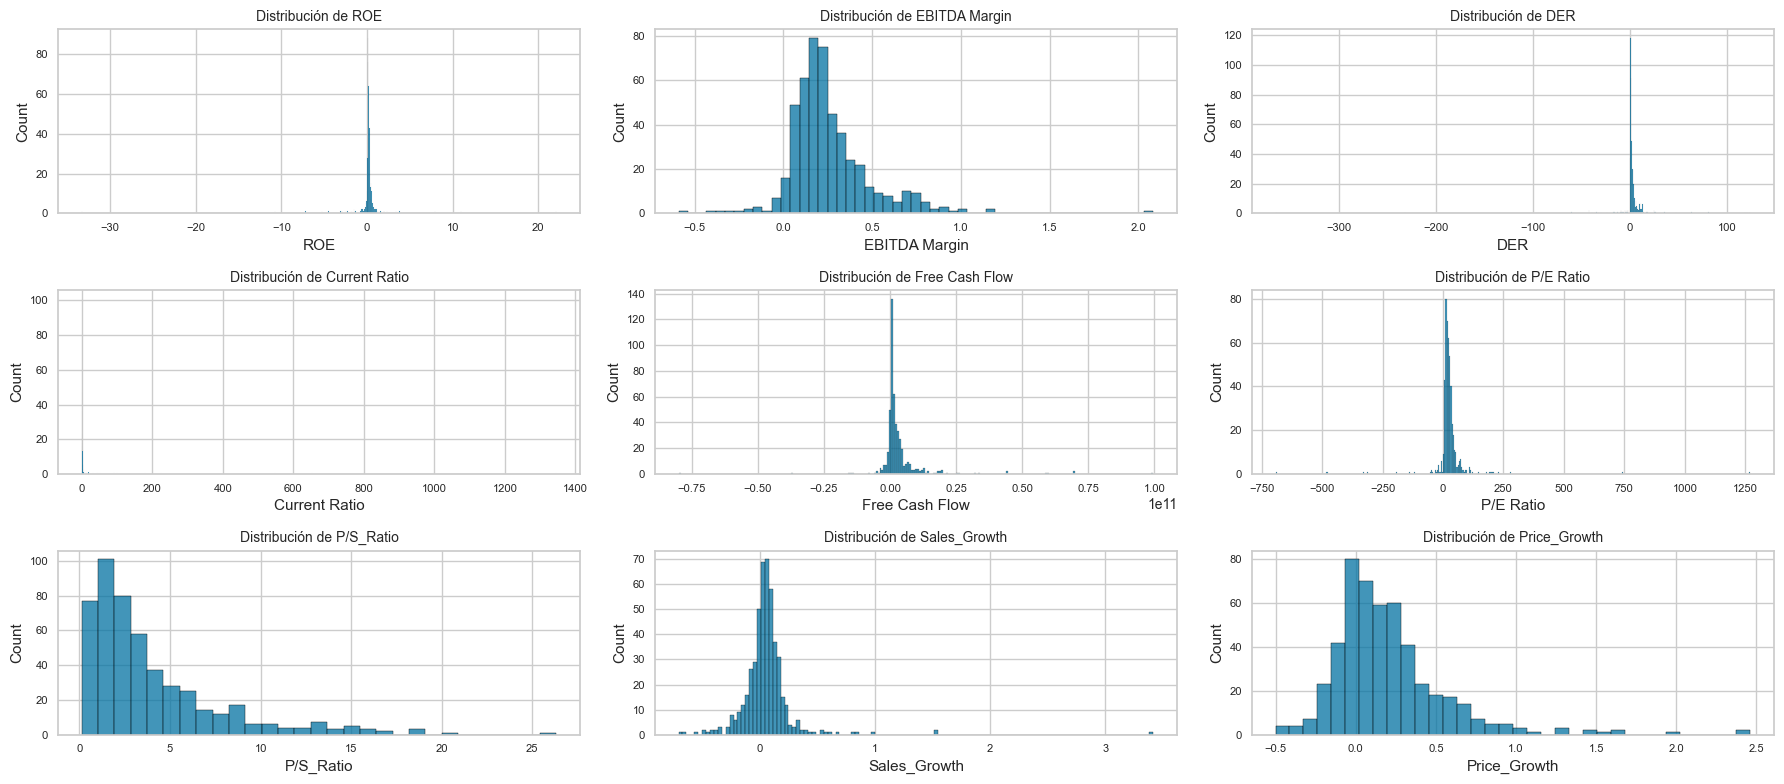

In [ ]:
## Miramos el histograma de cada variable
# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 8))  # Ajusta el tamaño según necesidad

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flat

# Lista de columnas/variables a graficar (ejemplo con 6 variables)
columnas = ['ROE', 'EBITDA Margin', 'DER', 'Current Ratio', 'Free Cash Flow', 'P/E Ratio', 'P/S_Ratio', 'Sales_Growth', 'Price_Growth']

# Iterar sobre cada eje y columna
for ax, col in zip(axes, columnas):
    sns.histplot(
        data = df_clus,
        x = col,
        ax = ax
    )
    ax.set_title(f'Distribución de {col}', fontsize = 10)
    ax.tick_params(labelsize = 8)

# Ajustar espaciado entre gráficos
plt.tight_layout()

# Eliminar ejes vacíos (si hay menos de 6 gráficos)
for ax in axes[len(columnas):]:
    ax.remove()

plt.show()

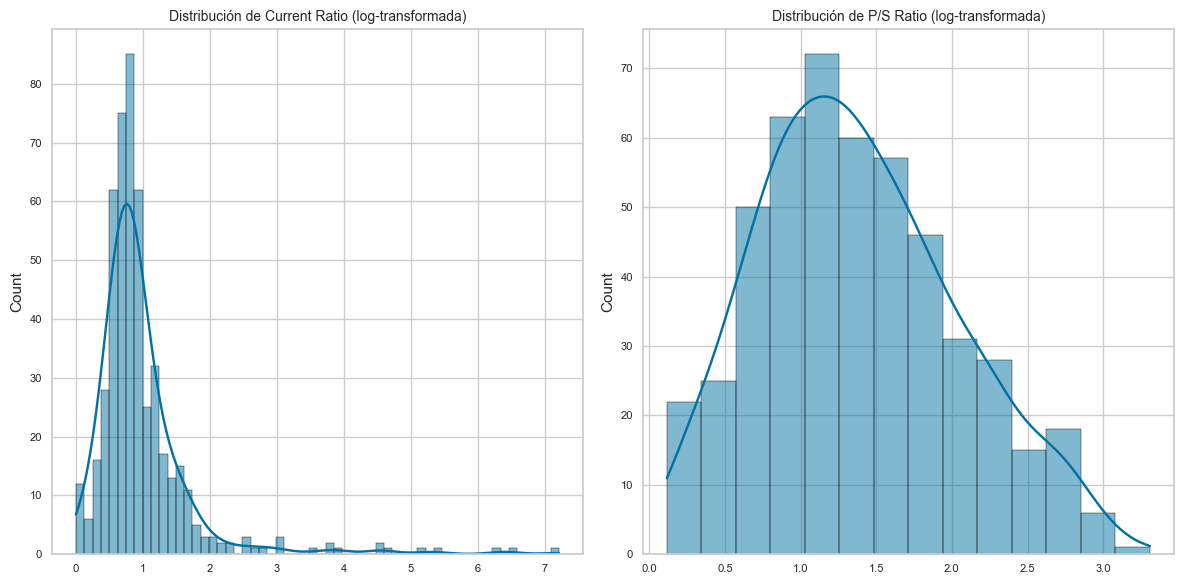

In [ ]:
# Vemos que las unicas dos variables que podemos transformar con el logaritmo son Current Ratio y P/S_Ratio (no tienen valores negativos)
log_current_ratio = np.log1p(df_clus['Current Ratio'])
log_ps_ratio = np.log1p(df_clus['P/S_Ratio'])

# Crear una lista de tuplas con las variables y sus nombres
variables = [
    (log_current_ratio, 'Current Ratio'),
    (log_ps_ratio, 'P/S Ratio')
]

# Configurar la grilla de gráficos 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
axes = axes.flat  # Convertir la matriz 2x1 en un array 1D

# Iterar sobre cada eje y variablen
for ax, (var, nombre) in zip(axes, variables):
    sns.histplot(
        x = var,
        ax = ax,
        kde = True  
    )
    ax.set_title(f'Distribución de {nombre} (log-transformada)', fontsize = 10)
    ax.set_xlabel('')  
    ax.tick_params(labelsize=8)

# Ajustes finales
plt.tight_layout()
plt.show()

In [9]:
# Las dos graficas mejoran los histogramas normales y parecen mas normales por lo tanto vamos a sustituir las variables originales por las transformadas
df_clus['Current Ratio'] = log_current_ratio
df_clus['P/S_Ratio'] = log_ps_ratio

<Figure size 2000x2000 with 0 Axes>

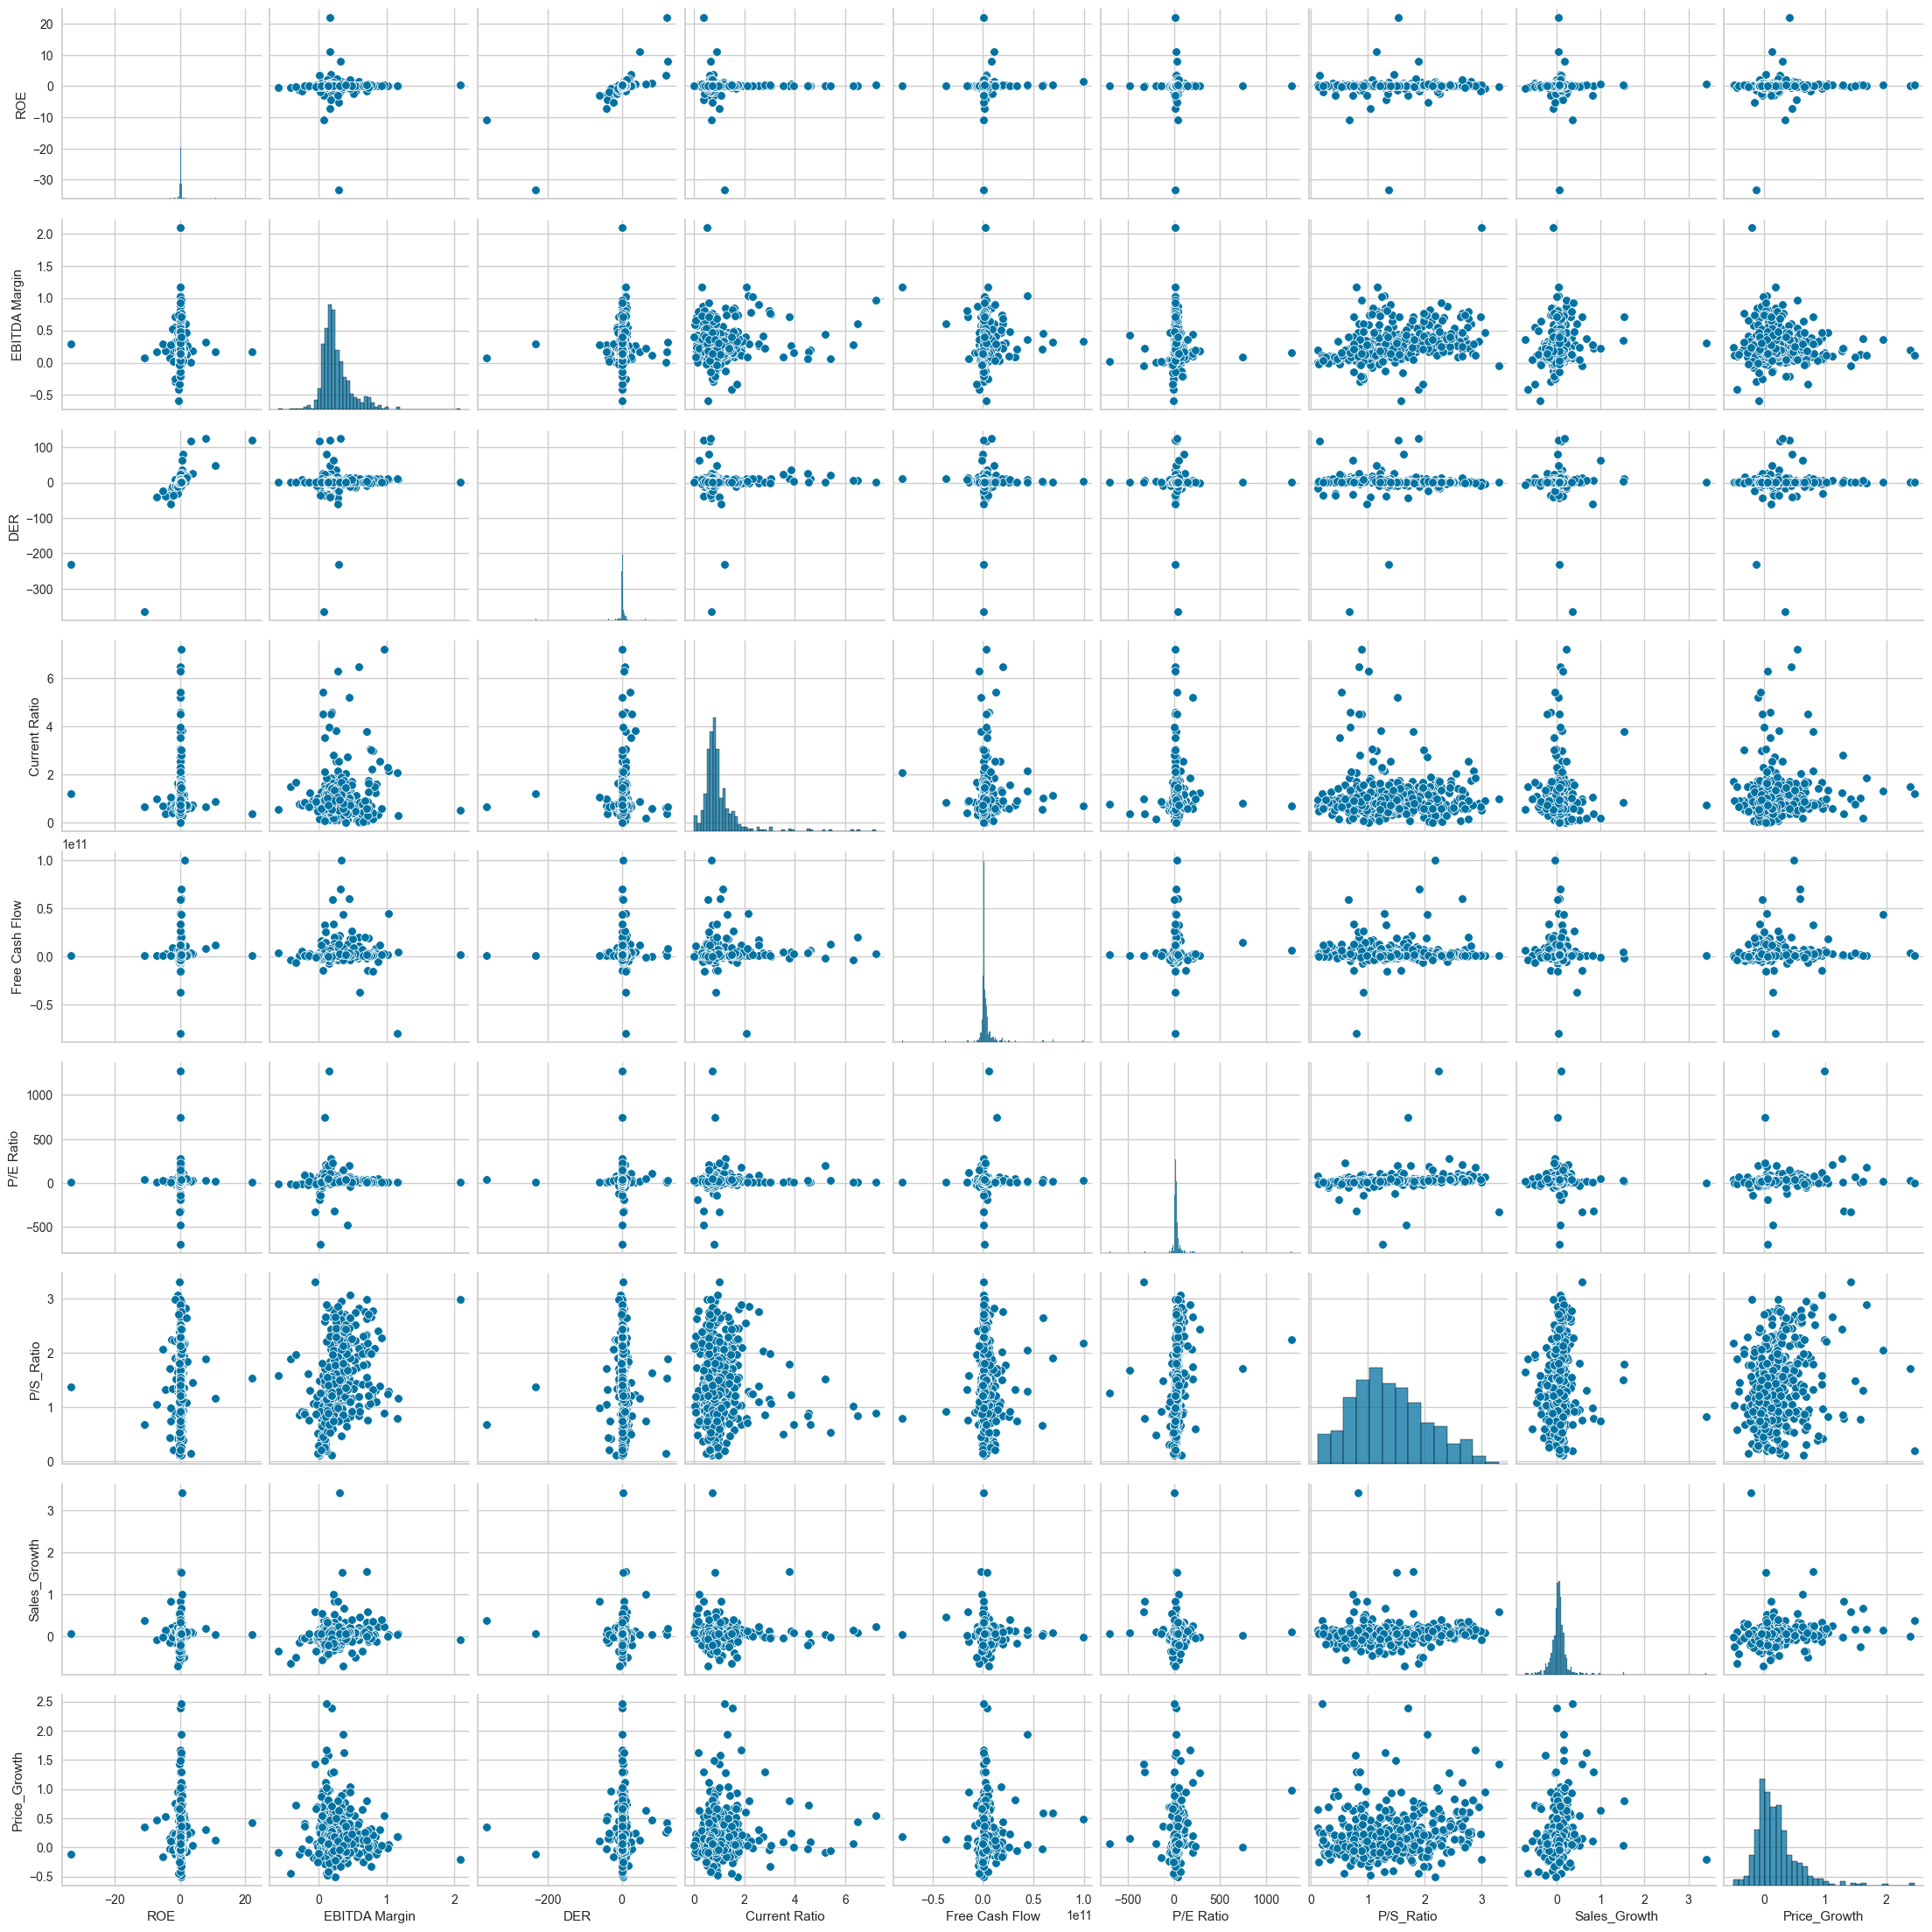

In [10]:
# Hacemos los scatter plots que nos serivran para ver correlaciones y valores extremos 
plt.figure(figsize = (20, 20))
sns.pairplot(df_clus, vars = df_clus.columns);

In [11]:
df_clus.shape

(494, 9)

In [12]:
# Eliminar valores extremos

df_clus = df_clus[df_clus['ROE'] < 10]
df_clus = df_clus[df_clus['ROE'] > -10] 
df_clus = df_clus[df_clus['EBITDA Margin'] < 1.5]
df_clus = df_clus[df_clus['DER'] > -50]
df_clus = df_clus[df_clus['P/E Ratio'] < 1000]
df_clus = df_clus[df_clus['Sales_Growth'] < 2]
df_clus = df_clus[df_clus['Price_Growth'] < 2]


df_final = df_final[df_final['ROE'] < 10]
df_final = df_final[df_final['ROE'] > -10] 
df_final = df_final[df_final['EBITDA Margin'] < 1.5]
df_final = df_final[df_final['DER'] > -50]
df_final = df_final[df_final['P/E Ratio'] < 1000]
df_final = df_final[df_final['Sales_Growth'] < 2]
df_final = df_final[df_final['Price_Growth'] < 2]

In [13]:
# Vemos cuantas observaciones perdemos a la hora de eliminar outliers 
df_clus.shape

(484, 9)

<Figure size 2000x2000 with 0 Axes>

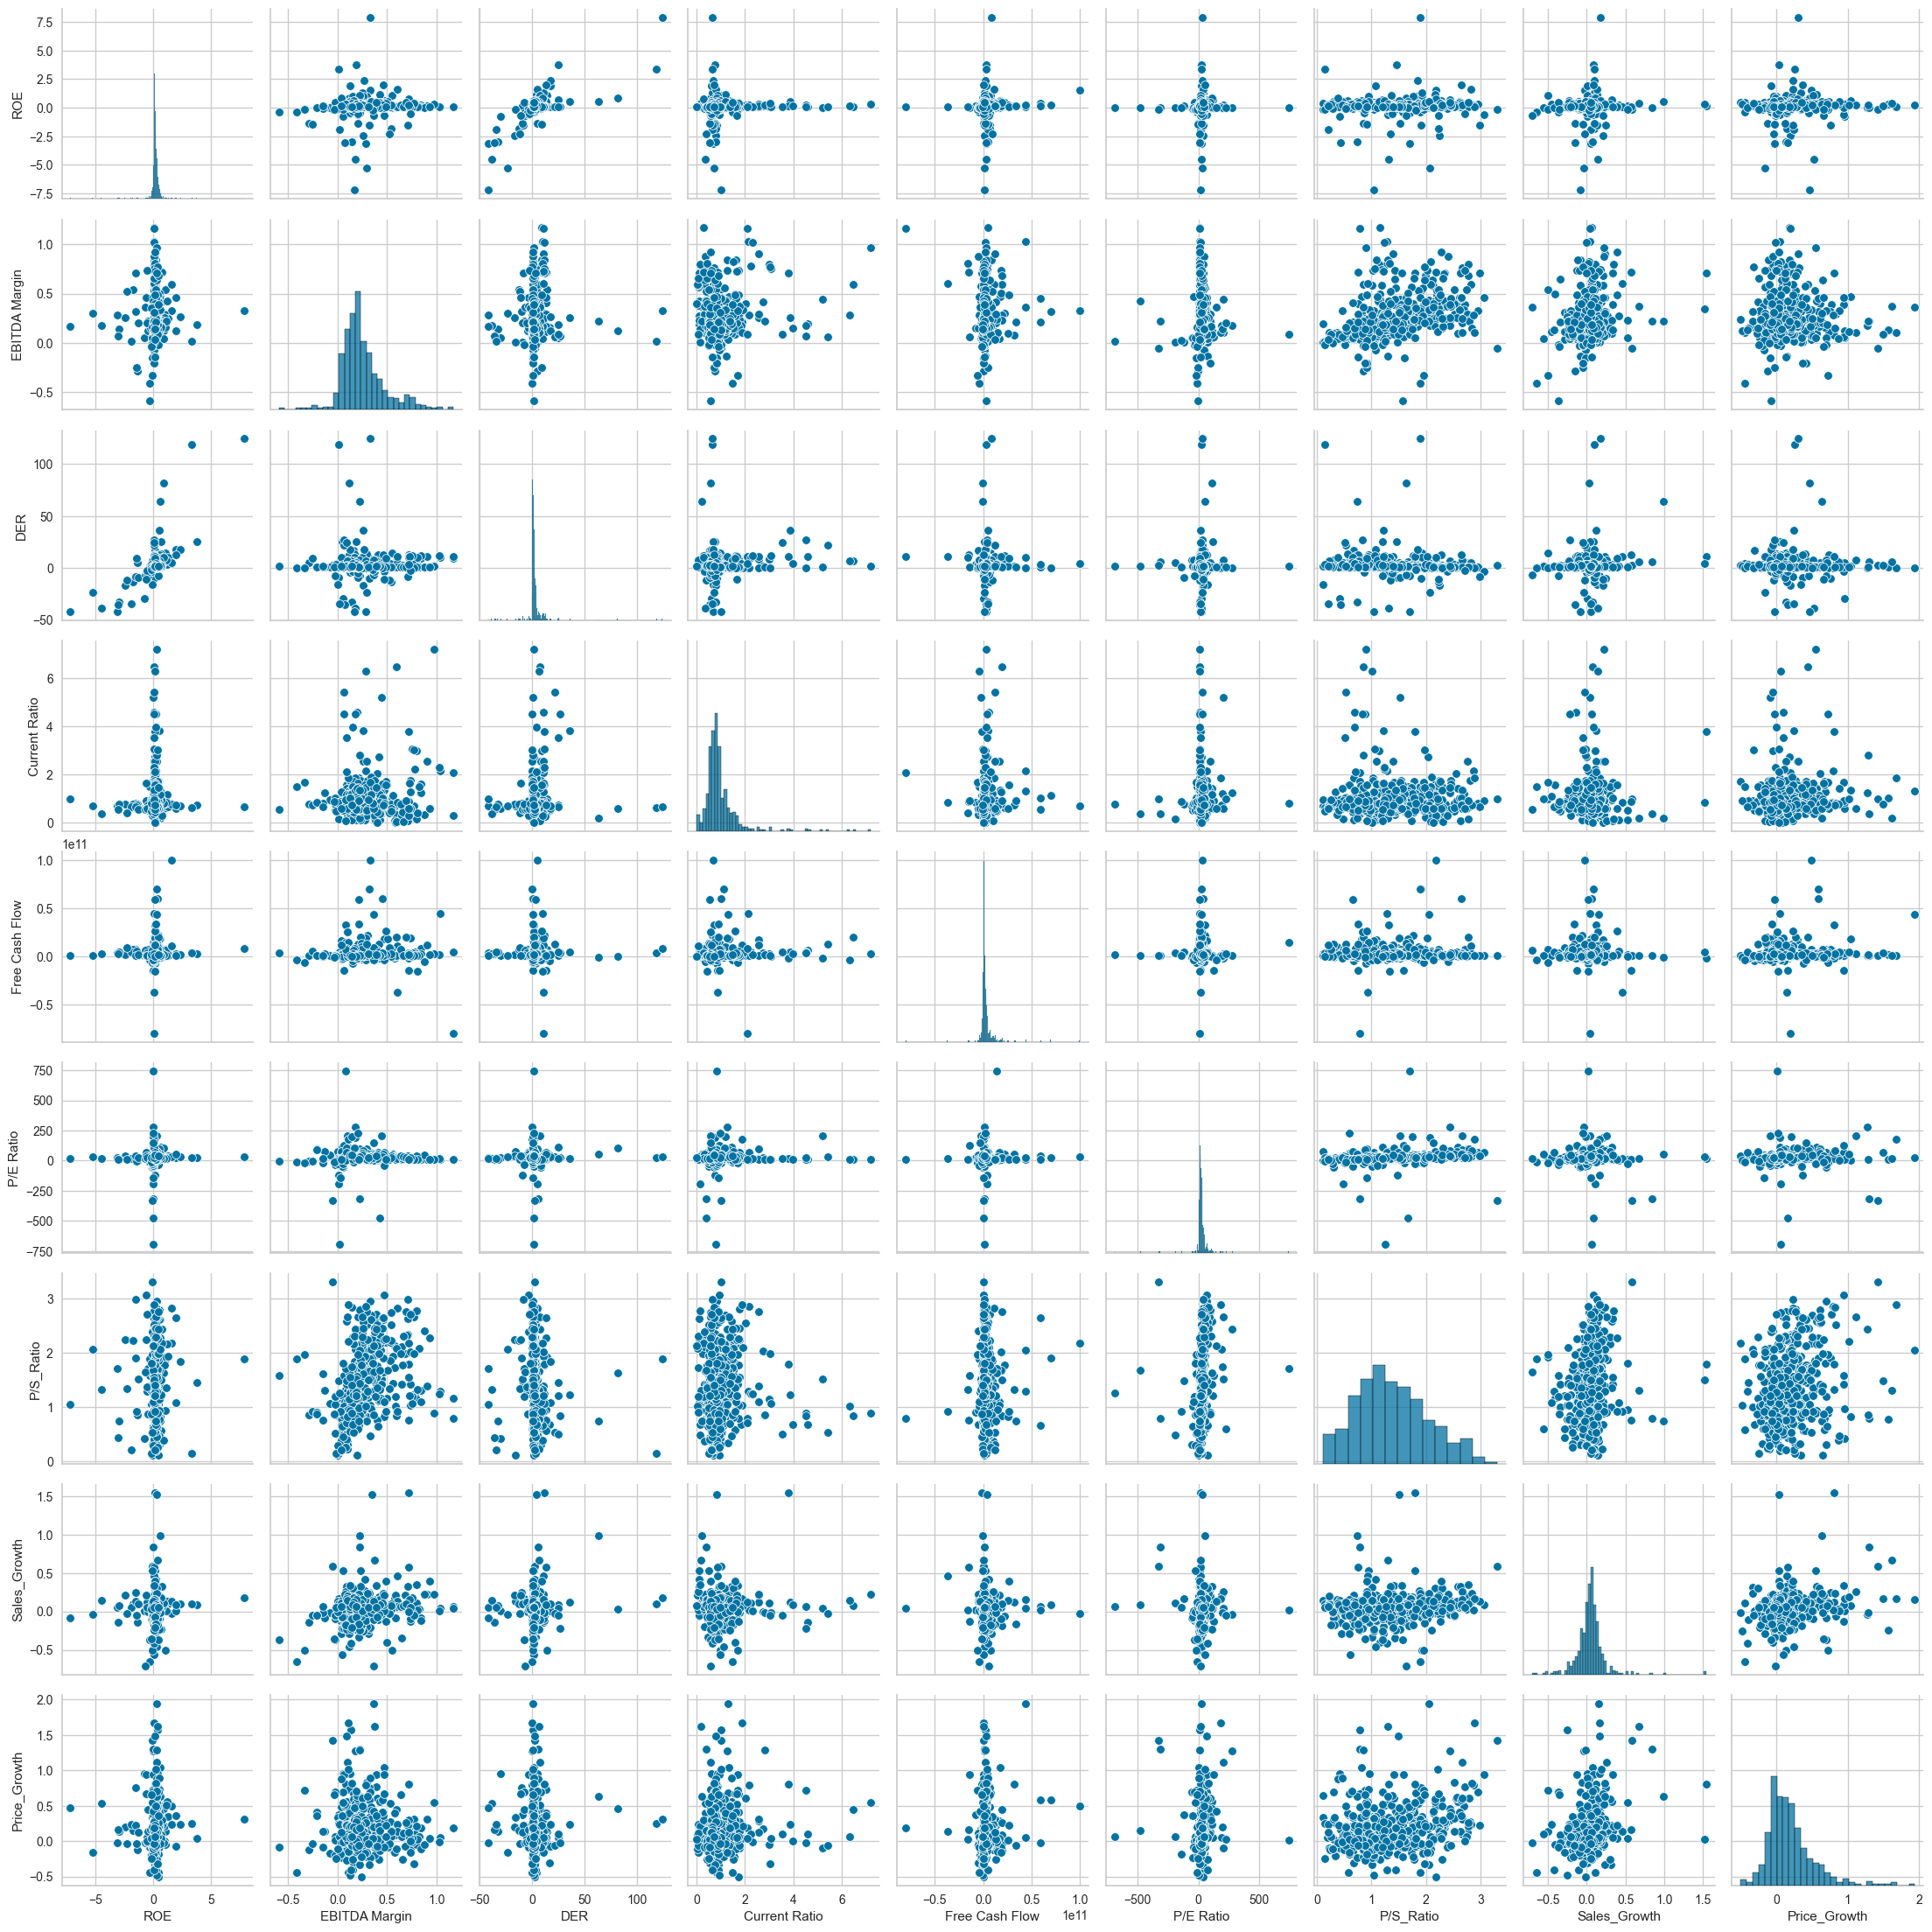

In [14]:
# Hacemos los scatter plots de nuevo para ver el resultado final 
plt.figure(figsize = (20, 20))
sns.pairplot(df_clus, vars = df_clus.columns);

In [15]:
df_clus.describe()

,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth
count,484.000000,484.000000,484.000000,484.000000,4.840000e+02,484.000000,484.000000,484.000000,484.000000
mean,0.140709,0.257632,2.820295,0.995744,3.247070e+09,24.608689,1.380704,0.044837,0.190906
std,0.779364,0.219886,11.155410,0.802210,9.893848e+09,66.160537,0.650971,0.189032,0.325499
min,-7.206349,-0.590057,-42.010896,0.003207,-7.999900e+10,-693.057613,0.116565,-0.706787,-0.501283
25%,0.080306,0.123995,0.814203,0.623243,5.837490e+08,12.816349,0.893571,-0.025514,-0.018360
50%,0.151421,0.213282,1.610026,0.813169,1.378250e+09,21.962898,1.304793,0.050198,0.134946
75%,0.276961,0.339897,3.262359,1.115744,3.515543e+09,32.682708,1.798308,0.111164,0.318455
max,7.924511,1.168209,124.241379,7.205529,9.958400e+10,742.699631,3.308133,1.541875,1.941333


# DATA PREPROCESSING

    - Scalar las variables usando Standard Scaler. 

In [16]:
# Scaling 
scaler = StandardScaler() #RobustScaler()
scaler.fit(df_clus)
scaled_df = pd.DataFrame(scaler.transform(df_clus), columns = df_clus.columns)
scaled_df.describe()

,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth
count,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02,4.840000e+02
mean,-3.119635e-17,-2.752619e-17,-2.936127e-17,-1.651571e-17,3.211389e-17,1.101048e-17,1.468064e-16,7.340318e-18,2.936127e-17
std,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00,1.001035e+00
min,-9.436750e+00,-3.859116e+00,-4.022943e+00,-1.238534e+00,-8.422628e+00,-1.085857e+01,-1.943935e+00,-3.980300e+00,-2.128748e+00
25%,-7.758299e-02,-6.083863e-01,-1.800174e-01,-4.648243e-01,-2.694682e-01,-1.784227e-01,-7.490913e-01,-3.725510e-01,-6.435750e-01
50%,1.375962e-02,-2.019061e-01,-1.086039e-01,-2.278260e-01,-1.890825e-01,-4.003185e-02,-1.167321e-01,2.838758e-02,-1.720994e-01
75%,1.750059e-01,3.745087e-01,3.966872e-02,1.497413e-01,2.716336e-02,1.221630e-01,6.421739e-01,3.512409e-01,3.922627e-01
max,9.997715e+00,4.145414e+00,1.089576e+01,7.748854e+00,9.747128e+00,1.086500e+01,2.963914e+00,7.927707e+00,5.383233e+00


In [17]:
# Calcular la matriz de correlación solo con las columnas numéricas
corr_matrix = scaled_df.corr(numeric_only = True)

corr_matrix.style.background_gradient(cmap = 'coolwarm')

,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth
ROE,1.000000,0.038769,0.719281,0.020039,0.073438,0.024812,0.030598,0.055399,0.030048
EBITDA Margin,0.038769,1.000000,0.042357,0.130489,-0.010142,0.016478,0.404800,0.192745,-0.016233
DER,0.719281,0.042357,1.000000,0.082537,-0.001797,0.019131,-0.073224,0.111244,-0.009228
Current Ratio,0.020039,0.130489,0.082537,1.000000,0.024099,0.046624,-0.031302,0.010036,0.090994
Free Cash Flow,0.073438,-0.010142,-0.001797,0.024099,1.000000,0.018013,0.045331,-0.024257,0.105501
P/E Ratio,0.024812,0.016478,0.019131,0.046624,0.018013,1.000000,0.193819,-0.044660,0.038414
P/S_Ratio,0.030598,0.404800,-0.073224,-0.031302,0.045331,0.193819,1.000000,0.148553,0.224273
Sales_Growth,0.055399,0.192745,0.111244,0.010036,-0.024257,-0.044660,0.148553,1.000000,0.253185
Price_Growth,0.030048,-0.016233,-0.009228,0.090994,0.105501,0.038414,0.224273,0.253185,1.000000


La correlacion mas alta es entre la variable **ROE** y **DER** y es de 0.72. Por lo tanto no hay correlaciones muy altas entre variables que puedan afectar al clustering. Manetenmos todas las variables en la base de datos. 

------------------------------------------------------------------------------------------------------------------

# CLUSTERING

In [18]:
from sklearn.metrics import silhouette_score

sse = {}
sum_of_squared_distances = []
silhouette_scores = []

for k in range(2, 15):

    print(f'Fitting pipe with {k} clusters. :)')

    clustering_model = KMeans(n_clusters = k, random_state = 44)
    y_pred = clustering_model.fit_predict(scaled_df)
    sum_of_squared_distances.append(clustering_model.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, y_pred))

    sse[k] = clustering_model.inertia_ 

Fitting pipe with 2 clusters. :)
Fitting pipe with 3 clusters. :)
Fitting pipe with 4 clusters. :)
Fitting pipe with 5 clusters. :)
Fitting pipe with 6 clusters. :)
Fitting pipe with 7 clusters. :)
Fitting pipe with 8 clusters. :)
Fitting pipe with 9 clusters. :)
Fitting pipe with 10 clusters. :)
Fitting pipe with 11 clusters. :)
Fitting pipe with 12 clusters. :)
Fitting pipe with 13 clusters. :)
Fitting pipe with 14 clusters. :)


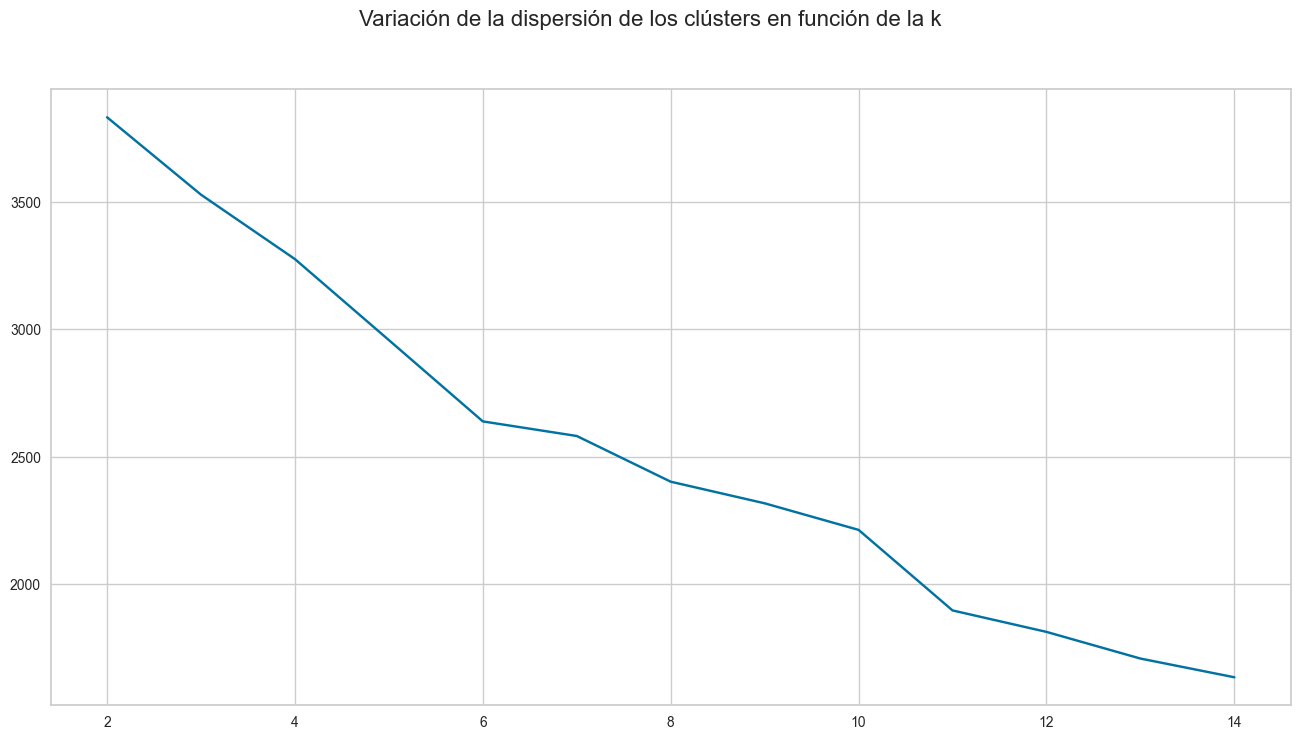

In [19]:
## ELBOW CURVE
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Elbow Method to determine the number of clusters to be formed:


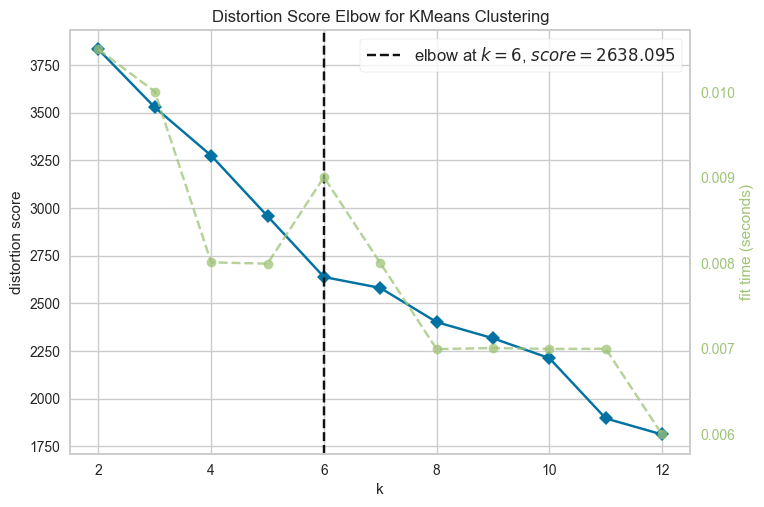

In [20]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state = 44), k = 12)
Elbow_M.fit(scaled_df)
Elbow_M.show();

Vemos dos codos significativos, en k = 3 y k = 6. Haremos los dos clusterings. 

## Clustering con 6 grupos

In [21]:
KM = KMeans(n_clusters = 6, random_state = 1441)
clusters = KM.fit_predict(scaled_df)

In [22]:
df_ficha = df_final.copy()
df_ficha.drop(['ticker'], axis = 1, inplace = True)

In [23]:
df_ficha['cluster'] = clusters

In [24]:
df_ficha.head(4)

,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth,cluster
10,0.212147,0.232017,0.841403,2.611354,1.474000e+09,32.586410,5.956242,0.001476,-0.064231,1
21,1.560760,0.331671,4.673462,0.988012,9.958400e+10,30.715664,7.853566,-0.030774,0.490041,4
32,0.469402,0.301263,12.002992,0.872123,2.206200e+10,54.336231,4.864632,-0.064354,-0.002272,1
36,0.586895,0.158818,1.528475,1.659196,3.837000e+09,18.182304,8.785883,0.189517,0.592281,0


In [25]:
columnas = list(df_ficha.columns[:-1])
ficha_df = pd.DataFrame()

for i, col in enumerate(columnas):    
    resumen_data = df_ficha[['cluster', col]].groupby('cluster').describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

In [26]:
estadisticos = ['Media', 'Desviacion', 'Minimo', 'Perc. 25', 'Perc. 50', 'Perc. 75', 'Maximo']
new_multiindex = []

for vars in columnas:
    for es in estadisticos: 
        new_multiindex.append((vars, es))

In [27]:
def generate_multiindex(list_of_tuples, names): ## Funcion generalista para usar siempre con nuestra tupla 
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [28]:
names = ['Variable', 'Estadistico']

index_ficha = generate_multiindex(new_multiindex, names)

In [29]:
ficha_df.set_index(index_ficha, inplace = True)

In [30]:
tamaño_clsuters = df_ficha.groupby('cluster').size().to_frame().T

tamaño_clsuters.set_index(generate_multiindex([('Cluster','Tamaño')], names), inplace = True)

ficha_df = pd.concat([tamaño_clsuters, ficha_df])

In [31]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

### Cluster 0: "Rentabilidad Moderada con Buen Crecimiento" / “Crecimiento Rentable – Alto Precio” / "Empresas de Crecimiento con Alta Valoración"

**Rentabilidad:**
- ROE promedio de ~25% indica una rentabilidad aceptable, aunque no sobresaliente (buena rentabilidad).

**Solvencia/Liquidez:**
- Un Current Ratio alto en promedio (media ~3.09, aunque la mediana es menor) sugiere que, en general, estas empresas tienen capacidad para cubrir sus obligaciones a corto plazo (liquidez moderada).

**Valoración:**
- Los múltiplos (P/E ~41 y P/S ~8) son elevados, lo que indica que el mercado ya valora su potencial de crecimiento, pero también pueden estar sobrevaloradas.

**Crecimiento:**
- Con Sales Growth alrededor del 20% y Price Growth cerca del 67%, estas empresas muestran un dinamismo en ingresos y en la evolución de su precio, lo que las sitúa en una categoría de crecimiento fuerte (fuerte impulso en crecimiento).

Comparado con otros grupos, este cluster presenta un crecimiento de ventas y precios superior, sin llegar a extremos de riesgo o volatilidad.
Estas empresas son atractivas por su crecimiento y rentabilidad, aunque el precio elevado podría limitar el potencial de revalorización futura.

En resumen, a pesar de contar con un alto nivel de deuda (DER 2.8), estas empresas son muy rentables (ROE del 25%) y generan suficiente liquidez para cubrir sus obligaciones. Los altos múltiplos y el robusto crecimiento respaldan las expectativas del mercado de un potencial de expansión elevado, aunque el apalancamiento implica un riesgo mayor que debe gestionarse cuidadosamente.

### Cluster 1: "Empresas Maduras y Estables" / “Estables con Valoración Atractiva, pero Sin Impulso de Crecimiento” / "Empresas Estables de Valor"

**Rentabilidad:**
- ROE cercano al 24% mantiene un buen nivel, similar al Cluster 0 pero sin la agresividad en crecimiento (muestra solidez en la generación de beneficios).

**Solvencia/Liquidez:**
- Un Current Ratio de ~1.63 indica menor solvencia que en el Cluster 0, lo que podría reflejar una estructura de capital más optimizada para empresas maduras.(cierta fragilidad en liquidez).

**Valoración:**
- Con múltiplos (P/E ~35 y P/S ~4.2) más contenidos, se interpreta como un segmento de empresas que cotizan a precios más “razonables” y orientadas al valor. Indica que están en un estado de madurez. 

**Crecimiento:**
- Tanto Sales Growth como Price Growth son prácticamente nulos, lo que apunta a empresas consolidadas sin mucho dinamismo en expansión (estancamiento en su impulso de expansión).

ROE y EBITDA margin similares a Cluster 0, pero con crecimiento muy bajo (Sales Growth casi nulo y Price Growth muy reducido). La falta de crecimiento distingue a este grupo de los clusters más dinámicos, reflejando empresas consolidadas pero sin potencial de expansión.
Aunque tienen fundamentos sólidos y están relativamente baratas, la falta de crecimiento y la liquidez moderada hacen que sean menos dinámicas a la hora de generar valor a largo plazo.

En resumen, aunque estas empresas son rentables y generan buen flujo de caja, el alto apalancamiento y la escasa capacidad de crecimiento en ventas plantean desafíos para sostener su expansión a largo plazo.

### Cluster 2: "Operativas Eficientes pero con Problemas de Rentabilidad" / “Rentabilidad Negativa, Operativa con Buen Margen” / “Empresas con Problemas de Rentabilidad”

**Rentabilidad:**
- Un ROE negativo (alrededor de -42%) es una señal clara de que, a nivel neto, estas empresas tienen dificultades en generar beneficios para sus accionistas, a pesar de mostrar un EBITDA margin elevado (67%).
- EBITDA margin muy alto, lo que sugiere eficiencia operativa

**Solvencia/Liquidez:**
- El Current Ratio (~2.71) es decente, lo que indica que la capacidad para cubrir obligaciones a corto plazo no es el problema principal.
- Free Cash Flow negativo, indicando que, pese a tener buenos márgenes, la rentabilidad neta es afectada por inversiones excesivas o problemas en el flujo.

**Valoración:**
- Los múltiplos (P/E ~22 y P/S ~6.18) podrían parecer atractivos, pero al tener resultados netos negativos, su valoración resulta engañosa (opacados por la falta de rentabilidad).

**Crecimiento:**
- Tanto el crecimiento de ventas (8.4%) como el de precios (9.2%) son moderados, sin compensar la baja rentabilidad (o negativa).

La contradicción entre un excelente EBITDA y flujos de caja negativos (junto a un ROE negativo) evidencia que, aunque las operaciones son robustas, existen problemas de conversión a ganancias netas.

Este grupo parece reunir empresas con problemas estructurales de rentabilidad, a pesar de tener márgenes EBITDA altos en promedio; no es un candidato atractivo para inversión a largo plazo.

### Cluster 3: "Bajo Rendimiento y Crecimiento Estancado" / “Subvaloradas y de Bajo Impulso” / “Empresas de Bajo Rendimiento y Subvaloradas”

**Rentabilidad:**
- Con un ROE de apenas ~8% y un EBITDA margin muy bajo (alrededor del 9%), estas empresas presentan un desempeño operativo débil, la rentabilidad es pobre.

**Solvencia/Liquidez:**
- Un Current Ratio de ~1.43 sugiere una liquidez algo limitada, aunque no alarmante (liquidez débil).

**Valoración:**
- Los múltiplos bajos (P/E ~5.5 y P/S ~1.28) indican que el mercado las valora muy por debajo de sus pares, lo cual podría interpretarse como una oportunidad de “value investing”; sin embargo, la baja rentabilidad y márgenes reducidos hacen que el riesgo sea elevado o que se encuentren en sectores muy maduros o en dificultades

**Crecimiento:**
- Con un crecimiento en ventas prácticamente nulo y un Price Growth moderado, el potencial de revalorización es limitado.

Este grupo se diferencia por su bajo dinamismo, lo que sugiere que son empresas con problemas estructurales o en etapas de declive.
Aunque en teoría su baja valoración podría hacerlas “baratas”, la falta de rentabilidad y crecimiento limita su atractivo, a menos que se espere una recuperación extraordinaria.

En resumen, estas empresas se distinguen por tener una rentabilidad neta baja y un crecimiento de ventas casi nulo, pero se cotizan a múltiplos muy bajos, lo que puede representar una valoración atractiva, siempre que se gestione adecuadamente el riesgo derivado de su nivel de apalancamiento y su modesta liquidez.

### Cluster 4: "Gigantes Financieros Sólidos" / "Líderes de Calidad – Rentables y Saludables" / “Empresas Líderes de Alto Rendimiento”

**Rentabilidad:**
- ROE de ~42% es muy atractivo y destaca como uno de los más altos; sumado a un EBITDA margin de ~43% confirma una operación altamente eficiente (capacidad para generar beneficios).

**Solvencia/Liquidez:**
- El Current Ratio de ~2.54 sugiere buena capacidad para hacer frente a compromisos de corto plazo y el Free Cash Flow es excepcionalmente alto, lo que refuerza la solidez financiera (fuerte generación de liquidez).
- un perfil de riesgo moderado (DER en niveles adecuados)

**Valoración:**
- Múltiplos moderados (P/E ~22 y P/S ~6.1) indican que, a pesar de su alta rentabilidad, la valoración es razonable en comparación con empresas de crecimiento agresivo (precio no está inflado en exceso a pesar de su alta calidad).

**Crecimiento:**
- Si bien el Sales Growth es moderado (alrededor del 6%), el Price Growth elevado (60%) señala una fuerte revalorización en el mercado.

A pesar de contar con menos empresas (cluster pequeño), sus características indican empresas líderes, con solidez financiera y capacidad para invertir en crecimiento.
Este cluster agrupa a las empresas de mayor calidad, con fundamentos sólidos, buena liquidez y márgenes razonables en valoración. Se destacan por su solidez operativa y financiera.

En conjunto, estas empresas presentan una combinación de alta rentabilidad y generación de efectivo, aunque el elevado endeudamiento implica un mayor riesgo que debe gestionarse cuidadosamente para sostener su potencial de crecimiento.

### Cluster 5: "Empresas Altamente Apalancadas y Volátiles" / “Ganadores Apalancados – Rentabilidad Extremada con Riesgo” / “Empresas de Rentabilidad Extremadamente Alta pero con Riesgo de Apalancamiento”

**Rentabilidad:**
- ROE promedio muy alto por no decir impactante (≈99% en promedio), aunque la mediana es mucho menor, lo que indica alta dispersión (algunos outliers elevan el promedio).

**Solvencia/Liquidez:**
- Un Current Ratio extremadamente alto (~4.10) sugiere abundante liquidez, pero esto se compensa con un nivel de apalancamiento extraordinario (DER promedio de ≈33, mediana de ≈16) con un der tan alto es señal de alta deuda.
- Current Ratio muy elevado, lo que puede indicar una posición de liquidez “inflada” para compensar el elevado apalancamiento.
- Un Current Ratio extremadamente alto (media ~240) puede indicar posiciones de liquidez muy elevadas, aunque es atípico y podría depender de características puntuales o sectores específicos.
- El DER muy elevado (alrededor de 33) implica un riesgo financiero significativo; a pesar de la rentabilidad espectacular, la alta deuda podría poner en jaque la estabilidad a largo plazo.

**Valoración:**
- El P/E elevado (~37) contrasta con un P/S bajo (~1.9), lo que puede reflejar optimismo en cuanto a rentabilidad, pero también la presión del mercado por el alto apalancamiento.

**Crecimiento:**
- Con Sales Growth y Price Growth modestos (4.45% y 21.9%, respectivamente), el crecimiento no compensa el elevado nivel de deuda.

La alta deuda (DER) y la gran variabilidad en ROE sugieren que estas empresas están sujetas a un alto nivel de riesgo financiero, posiblemente impulsando sus retornos de manera especulativa.
A pesar de la alta rentabilidad que muestra el promedio, el elevado endeudamiento implica un riesgo considerable. La alta liquidez puede ser un efecto de la necesidad de cubrir altos compromisos financieros, por lo que se debe tener precaución.

Este grupo de empresas presenta un escenario donde la alta rentabilidad (ROE ~99%) se ve impulsada en gran medida por un patrimonio muy reducido y un elevado apalancamiento (DER 33), lo que aumenta el riesgo. La liquidez es excesivamente alta (Current Ratio 240), lo que podría indicar ineficiencias en la utilización de activos corrientes. A pesar de un crecimiento modesto en ventas, el precio de las acciones ha aumentado significativamente, lo que refleja expectativas positivas del mercado. Estos datos requieren un análisis profundo para distinguir si se trata de empresas con un verdadero potencial de recuperación o si las cifras extremas son fruto de estructuras financieras distorsionadas.

In [32]:
df_final['cluster'] = clusters
df_final[df_final['cluster'] == 4]

,ticker,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth,cluster
21,AAPL,1.560760,0.331671,4.673462,0.988012,9.958400e+10,30.715664,7.853566,-0.030774,0.490041,4
547,BAC,0.090915,1.032156,9.904147,7.468760,4.414150e+10,9.776769,2.629625,0.038241,0.048209,4
2180,GOOG,0.260411,0.320629,0.419978,2.096585,6.949500e+10,23.710049,5.726171,0.086320,0.588302,4
2190,GOOGL,0.260411,0.320629,0.419978,2.096585,6.949500e+10,23.500749,5.675623,0.086320,0.583248,4
3210,META,0.255262,0.360832,0.499158,2.670995,4.384700e+10,23.151855,6.750625,0.152451,1.941333,4
3404,MSFT,0.350887,0.453551,0.997721,1.769167,5.947500e+10,38.337708,13.226196,0.069543,0.581919,4
4549,T,0.139404,0.208784,3.137545,0.713087,5.877500e+10,7.888713,0.927872,0.013972,-0.027194,4


In [33]:
df_final[df_final['cluster'] == 0]

,ticker,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth,cluster
36,ABNB,0.586895,0.158818,1.528475,1.659196,3.837000e+09,18.182304,8.785883,0.189517,0.592281,0
80,ADBE,0.328611,0.387552,0.802821,1.343352,6.942000e+09,50.009764,13.985934,0.102408,0.772799,0
124,ADSK,0.718777,0.227572,7.242795,0.835250,2.025000e+09,63.606561,10.459181,0.141131,0.302938,0
267,AMAT,0.419353,0.322334,0.879564,2.597260,7.594000e+09,19.538783,5.098496,0.026729,0.679814,0
284,AMD,0.015279,0.177792,0.214575,2.506802,1.121000e+09,278.939766,10.413751,-0.032770,1.275899,0
...,...,...,...,...,...,...,...,...,...,...,...
5010,VRTX,0.205888,0.455260,0.292928,3.987202,3.278900e+09,28.968286,10.695855,0.106019,0.408996,0
5121,WELL,0.013387,0.363085,0.694386,0.767810,-3.489022e+09,146.151137,7.487973,0.132645,0.417607,0
5132,WFC,0.103061,0.483718,9.395241,3.790317,2.654900e+10,9.069595,1.505204,0.392003,0.229335,0
5187,WST,0.205970,0.249546,0.329226,2.882405,4.145000e+08,43.513940,8.847412,0.010946,0.499714,0


In [34]:
df_final[df_final['cluster'] == 1]

,ticker,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth,cluster
10,A,0.212147,0.232017,0.841403,2.611354,1.474000e+09,32.586410,5.956242,0.001476,-0.064231,1
32,ABBV,0.469402,0.301263,12.002992,0.872123,2.206200e+10,54.336231,4.864632,-0.064354,-0.002272,1
47,ABT,0.148253,0.235018,0.896588,1.637887,5.059000e+09,32.790889,4.759257,-0.084979,0.022640,1
58,ACGL,0.242086,0.278568,2.209503,0.105686,5.697000e+09,5.935791,1.934335,0.418288,0.183020,1
69,ACN,0.267450,0.148305,0.994536,1.298344,8.996096e+09,31.657034,3.393031,0.040871,0.335729,1
...,...,...,...,...,...,...,...,...,...,...,...
5231,XEL,0.100534,0.188864,2.637545,0.719922,-5.270000e+08,18.841783,2.348923,-0.072110,-0.086932,1
5253,XYL,0.059906,0.128055,0.583907,1.761451,5.660000e+08,44.853821,3.709394,0.333575,0.047822,1
5264,YUM,-0.203232,0.353590,-1.792950,1.259984,1.318000e+09,22.543561,5.087912,0.034201,0.039362,1
5275,ZBH,0.082048,0.310874,0.721822,1.613180,2.884500e+09,24.542758,3.504446,0.057666,-0.038138,1


In [35]:
df_final[df_final['cluster'] == 2]

,ticker,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth,cluster
91,ADI,0.093197,0.487203,0.371976,1.369591,3.556171e+09,29.224973,8.036345,0.020337,0.233547,2
375,AON,-3.104116,0.281655,-42.010896,1.002448,3.183000e+09,22.534066,4.510331,0.055016,-0.023028,2
463,AVB,0.078826,0.708675,0.754752,0.635329,2.639810e+08,27.923148,9.370148,0.067271,0.202857,2
492,AWK,0.096356,0.559640,2.092579,0.645746,-7.010000e+08,26.791155,5.997356,0.115019,-0.116788,2
626,BK,0.080598,1.168209,9.050086,0.341146,4.692000e+09,11.690029,2.194803,0.068694,0.184702,2
744,BXP,0.032368,0.557283,3.034661,2.139925,7.755570e+08,55.441870,3.221522,0.053075,0.108262,2
755,C,0.044915,1.165966,10.735219,6.986625,-7.999900e+10,10.259350,1.206613,0.041466,0.189322,2
905,CFG,0.066059,0.733828,8.118561,4.697030,2.789000e+09,9.198948,1.798627,0.025309,-0.109279,2
1001,CME,0.120660,0.767553,3.851020,1.015771,3.377400e+09,22.955408,13.274792,0.111468,0.313005,2
1155,CPT,0.080973,0.682065,0.869740,0.267871,3.784190e+08,25.560681,6.305163,0.210301,-0.077131,2


In [36]:
df_final[df_final['cluster'] == 3]

,ticker,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth,cluster
102,ADM,0.139661,0.055272,1.484141,1.668248,2.966000e+09,10.586646,0.392540,-0.075042,-0.203969,3
157,AES,0.100080,0.155905,17.006029,0.683280,-4.690000e+09,49.687563,0.976650,0.004042,-0.309086,3
190,AIZ,0.133590,0.090993,5.993492,3.884488,9.356000e+08,13.411776,0.774109,0.092083,0.375061,3
245,ALL,-0.010580,0.006743,4.824536,0.155220,3.961000e+09,-191.087087,0.629214,0.110541,0.063373,3
272,AMCR,0.260308,0.144374,3.207402,1.185880,7.350000e+08,13.069692,0.938089,0.013818,-0.149505,3
...,...,...,...,...,...,...,...,...,...,...,...
5077,WBA,-0.153846,-0.016872,3.403596,0.631873,1.410000e+08,-6.774393,0.148537,0.056483,-0.250717,3
5088,WBD,-0.069120,0.161880,1.686751,0.927342,6.161000e+09,-8.879021,0.713646,0.116428,0.200422,3
5099,WDC,-0.153594,-0.034962,1.158884,1.451233,-1.229000e+09,-10.013741,1.403741,-0.351140,0.659905,3
5165,WMT,0.152296,0.032788,2.171046,0.820571,1.198400e+10,11.991342,0.229121,0.067280,0.128859,3


In [37]:
df_final[df_final['cluster'] == 5]

,ticker,ROE,EBITDA Margin,DER,Current Ratio,Free Cash Flow,P/E Ratio,P/S_Ratio,Sales_Growth,Price_Growth,cluster
179,AIG,0.080329,0.196744,10.760623,99.056000,6.003000e+09,12.610847,0.981610,-0.140459,0.097228,5
317,AMP,0.540495,0.259133,36.046099,45.871166,4.501000e+09,15.172228,2.409308,0.122925,0.239701,5
441,ARE,0.005611,0.444889,0.765972,179.998737,-2.053496e+09,203.689576,3.579710,0.044736,-0.091686,5
1067,COF,0.084130,0.597167,7.236740,653.988848,1.961400e+10,10.039645,1.333725,0.074073,0.443104,5
1100,COR,3.343454,0.012000,118.843652,0.876465,3.452975e+09,23.421462,0.155917,0.098859,0.253249,5
1410,DHI,0.209097,0.174651,0.416127,92.104046,4.155500e+09,10.634712,1.423254,0.059152,0.720653,5
2613,IRM,0.870474,0.119413,81.560676,0.776118,-3.685030e+08,108.590471,4.118542,0.030805,0.464314,5
3199,MET,0.052574,0.058964,21.900083,224.235294,1.255100e+10,29.711021,0.700755,-0.027119,-0.055056,5
3745,ORCL,7.924511,0.324559,124.241379,0.909658,8.470000e+09,33.232391,5.656705,0.177050,0.309407,5
3827,PCAR,0.289745,0.971396,1.570937,1345.857143,2.924100e+09,11.004022,1.441248,0.218868,0.549622,5
